<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 4 October, 23:59)</span>. It is expected that you will pose a questions about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2021 that we've been using). 

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2020 (Session 75). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1970-2020.tar.gz</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook. 

Notice that the 76th session of the UN General Assembly - where the 2021 debates will happen - will occur in 14-30 September 2021, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/76/meetings/). 

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that date [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the correspondig CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "../data/TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), errors="ignore")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [4]:
df_codes = pd.read_csv('../data/UNSD — Methodology.csv', delimiter=";")
df_un_members = df_codes.merge(df_speech).set_index(["Year", "ISO-alpha3 Code"])
df_un_members.head()

,,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,Session,Speech
Year,ISO-alpha3 Code,,,,,,,,,,,,,,,,,
1970,DZA,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,NaN,NaN,NaN,Developing,25,1. The delegation of Algeria is very pleased ...
1971,DZA,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,NaN,NaN,NaN,Developing,26,\n154.\t : It is not only in order to keep up ...
1972,DZA,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,NaN,NaN,NaN,Developing,27,"Mr. President, in electing you to preside over..."
1973,DZA,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,NaN,NaN,NaN,Developing,28,"ï»¿121.\tMr. President, since a tradition appe..."
1974,DZA,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,NaN,NaN,NaN,Developing,29,"Mr. President, it would be ungracious of the r..."


# Number of sessions over the years
Investigating the number of sessions, and participation


https://www.un.org/en/about-us/growth-in-un-membership

In [5]:
df_un_yearly_members = pd.read_csv('../data/un_members_per_year.csv', delimiter=';', index_col=1)
df_un_yearly_members.head()

,Number of members
Year,
1945,51
1946,55
1947,57
1948,58
1949,59


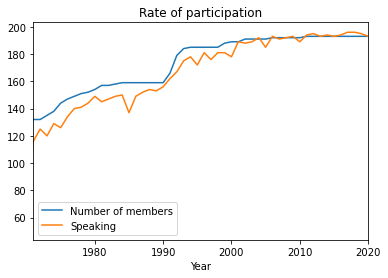

In [6]:
number_of_speeches = df_speech.groupby('Year')['Speech'].count()
number_of_members = df_un_yearly_members['Number of members']

fig, ax = plt.subplots()
ax.plot(number_of_members, label="Number of members")
ax.plot(number_of_speeches, label="Speaking")
ax.set_xlim([1971,2020])
ax.xaxis.label.set_text("Year")
ax.legend()
ax.title.set_text("Rate of participation")

# Subject analysis


In [7]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Preprocessing
In order to satisfy
- Filter out countries
- Abbreviations
- Stemming
- Lemmexiation

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

# Create 
- Further classify

# Resources
https://realpython.com/nltk-nlp-python/#using-named-entity-recognition-ner

In [8]:
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
import unicodedata
stop_words = stopwords.words("english")
country_names = np.char.lower(np.unique(df_un_members["Country or Area"].values).astype('U'))
country_names = np.append(country_names, ['soviet', 'united nations', 'us', 'uk'])

In [9]:
def preprocess(words):
    processed_words = []
    for w in words:
        if(not w.isalpha()):
            continue
        w = remove_accents(w)
        processed_words.append(w.lower())
    return processed_words

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def remove_stop_words(words):
    good_words = []
    for word in words:
        if (word not in stop_words):
            good_words.append(word)
    return good_words

def remove_country_name(words):
    contextual_words = []
    for word in words:
        if(not any(word in country_name.split() for country_name in country_names)):
            contextual_words.append(word)
    return contextual_words

def tokenize(speech):
    tokenized = word_tokenize(speech)
    tokenized = preprocess(tokenized)
    tokenized = remove_stop_words(tokenized)
    tokenized = remove_country_name(tokenized)
    return tokenized

def tokenize_row(row):    
    speech = row['Speech']
    return tokenize(speech)


1009


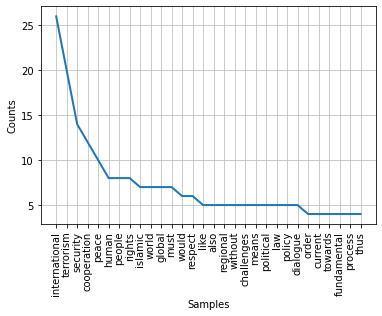

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
text = df_un_members.loc[2002,"UGB"]["Speech"]
unique_words = tokenize(text)
print(len(unique_words))
FreqDist(unique_words).plot(30)
